# DAT210x - Programming with Python for DS

## Module6- Lab2

"Is that a 1 or a 7?"

Even though the United States Postal Service, as an organization, was formed in 1971, it traces its roots back to the Post Office Department, an organization formed in 1792 by Benjamin Franklin. It later evolved into a cabinet-level department in 1872, before finally being transformed into the USPS we know today in 1971, as an agency of the U.S. government.

Back in the day, all mail was hand read and delivered. Even up the turn of the 20th century, antiquated techniques such as the pigeonhole method from colonial times were used for mail-handling. During the 1950's, the post office started intense research on the coding systems used in many other countries and started down the process of automation. In 1982, the first computer-driven, OCR machine got installed in Los Angeles, and by the end of 1984, over 250 OCRs machines were installed in 118 major mail processing centers across the country and were processing an average of 6,200 pieces of mail per hour.



Nowadays, the Postal Service is one of the world leaders in optical character recognition technology with machines reading nearly +98 percent of all hand-addressed letter mail and +99.5 percent of machine-printed mail, with a single tray sorting machines capable of sorting more than 18 million trays of mail per day.

Let's see if it is possible for you to train a support vector classifier on your computer in a few seconds using machine learning, and if your classification accuracy is similar or better than the advertised USPS stats. For this lab, you'll be making use of the Optical Recognition of Handwritten Digits dataset, provided courtesy of UCI's Machine Learning Repository.

Fully review the starter code stored in Module6/Module6 - Lab2.ipynb. If you have any questions about it, please ask them on the forum before you submit your lab answers. The dataset for the lab is stored at /Module6/Datasets/optdigits.tes and /Module6/Datasets/optdigits.tra. Check out the official dataset page at the UCI ML Repository to figure out why there are two files.
Make the requisite changes to get the project running, by providing the path to the .tes and .tra files.
Train your SVC classifier with the parameters provided, and keep testing until you're able to beat the classification abilities of the USPS.
Remember how important having a lot of samples is for machine learning? Try tossing out 96% of your samples, and see how it affects the accuracy of your highest accuracy support vector classifier.
Answer the questions below.

In [16]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

The dataset used in this lab comes from https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

At face value, this looks like an easy lab, but it has many parts to it, so prepare yourself by rading through it fully before starting.

### Convenience Functions

In [4]:
def load(path_train, path_test):
    # Load up the data.
    
    # You probably could have written this easily:
    with open(path_test, 'r')  as f: testing  = pd.read_csv(f)
    with open(path_train, 'r') as f: training = pd.read_csv(f)

    # The number of samples between training and testing can vary
    # But the number of features better remain the same!
    n_features = testing.shape[1]

    X_test  = testing.ix[:,:n_features-1]
    X_train = training.ix[:,:n_features-1]
    y_test  = testing.ix[:,n_features-1:].values.ravel()
    y_train = training.ix[:,n_features-1:].values.ravel()

    # Special:
    # ...
    
    return X_train, X_test, y_train, y_test

In [5]:
def peekData(X_train):
    # The 'targets' or labels are stored in y. The 'samples' or data is stored in X
    print("Peeking your data...")
    fig = plt.figure()
    fig.set_tight_layout(True)

    cnt = 0
    for col in range(5):
        for row in range(10):
            plt.subplot(5, 10, cnt + 1)
            plt.imshow(X_train.ix[cnt,:].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
            plt.axis('off')
            cnt += 1
            
    plt.show()

In [36]:
def drawPredictions(X_train, X_test, y_train, y_test):
    fig = plt.figure()
    fig.set_tight_layout(True)
    
    # Make some guesses
    y_guess = model.predict(X_test)

    # INFO: This is the second lab we're demonstrating how to
    # do multi-plots using matplot lab. In the next assignment(s),
    # it'll be your responsibility to use this and assignment #1
    # as tutorials to add in the plotting code yourself!
    num_rows = 10
    num_cols = 5

    index = 0
    plt.figure(figsize=(8,5))
    for col in range(num_cols):
        for row in range(num_rows):
            plt.subplot(num_cols, num_rows, index + 1)

            # 8x8 is the size of the image, 64 pixels
            plt.imshow(X_test.ix[index,:].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

            # Green = Guessed right
            # Red = Fail!
            fontcolor = 'g' if y_test[index] == y_guess[index] else 'r'
            plt.title('Label: %i' % y_guess[index], fontsize=6, color=fontcolor)
            plt.axis('off')
            index += 1
    plt.show()

### The Assignment

In [17]:
# TODO: Pass in the file paths to the .tra and the .tes files:
X_train, X_test, y_train, y_test = load(r'Datasets\optdigits.tra', r'Datasets\optdigits.tes')

In [18]:
X_train.head(3)

,0,1,6,15,12,1.1,0.1,0.2,0.3,7,...,0.20,0.21,0.22,0.23,6.3,14.1,7.4,1.3,0.24,0.25
0,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
1,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
2,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0


In [19]:
y_train[:3]

array([0, 7, 4], dtype=int64)

Get to know your data. It seems its already well organized in `[n_samples, n_features]` form. Your dataset looks like (4389, 784). Also your labels are already shaped as `[n_samples]`.

Peeking your data...


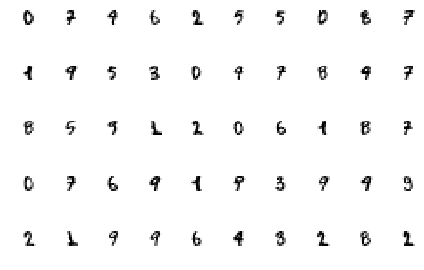

In [20]:
peekData(X_train)

Create an SVC classifier. Leave `C=1`, but set `gamma` to `0.001` and set the `kernel` to `linear`. Then train the model on the training data and labels:

In [55]:
print("Training SVC Classifier...")
from sklearn.svm import SVC
# model = SVC(C=1, kernel='linear', gamma=0.001)
# model = SVC(C=1, kernel='poly', gamma=0.001)
model = SVC(C=1, kernel='rbf', gamma=0.001)
model.fit(X_train, y_train)

Training SVC Classifier...


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Calculate the score of your SVC against the testing data:

In [56]:
print("Scoring SVC Classifier...")
score = model.score(X_test, y_test)
print("Score:\n", score)

Scoring SVC Classifier...
Score:
 0.982739420935412


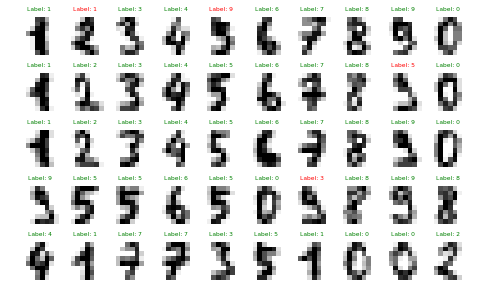

In [37]:
# Let's get some visual confirmation of accuracy:
drawPredictions(X_train, X_test, y_train, y_test)

Print out the TRUE value of the 1000th digit in the test set. By TRUE value, we mean, the actual provided, ground-truth label for that sample:

In [43]:
# .. your code here ..
true_1000th_test_value = y_test[:100]
print("1000th test label: ", true_1000th_test_value)

1000th test label:  [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9
 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5
 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4]


Predict the value of the 1000th digit in the test set. Was your model's prediction correct? If you get a warning on your predict line, look at the notes from the previous module's labs.

In [52]:
guess_1000th_test_value = model.predict(X_test[:100])

print("1000th test prediction: ")

for row in range(10):
        print(guess_1000th_test_value[10 * row + 1],
              guess_1000th_test_value[10 * row + 2],
              guess_1000th_test_value[10 * row + 3],
              guess_1000th_test_value[10 * row + 4],
              guess_1000th_test_value[10 * row + 5],
              guess_1000th_test_value[10 * row + 6],
              guess_1000th_test_value[10 * row + 7],
              guess_1000th_test_value[10 * row + 8],
              guess_1000th_test_value[10 * row + 9])
        

1000th test prediction: 
1 3 4 9 6 7 8 9 0
2 3 4 5 6 7 8 5 0
2 3 4 5 6 7 8 9 0
5 5 6 5 0 3 8 9 8
1 7 7 3 5 1 0 0 2
7 8 1 0 1 1 6 3 3
3 3 4 6 6 6 4 9 1
0 9 5 1 8 1 0 0 1
6 3 2 1 7 4 6 3 1
9 1 7 6 8 4 3 1 4


Use `imshow()` to display the 1000th test image, so you can visually check if it was a hard image, or an easy image:

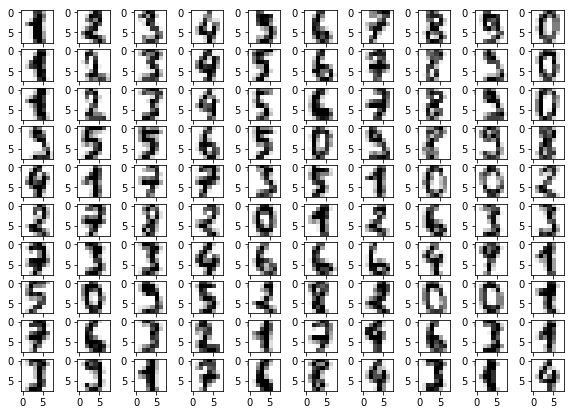

In [49]:
index = 0
total_row = 10
total_col = 10
plt.figure(figsize=(10,7))
for row in range(10):
    for col in range(10):        
        plt.subplot(total_row, total_col, index + 1)
        plt.imshow(X_test.ix[index, :].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
        index += 1

### To the Goal

- Were you able to beat the USPS advertised accuracy score of 98%? If so, STOP and answer the lab questions. But if you weren't able to get that high of an accuracy score, go back and change your SVC's kernel to 'poly' and re-run your lab again.


- Were you able to beat the USPS advertised accuracy score of 98%? If so, STOP and answer the lab questions. But if you weren't able to get that high of an accuracy score, go back and change your SVC's kernel to 'rbf' and re-run your lab again.


- Were you able to beat the USPS advertised accuracy score of 98%? If so, STOP and answer the lab questions. But if you weren't able to get that high of an accuracy score, go back and tinker with your gamma value and C value until you're able to beat the USPS. Don't stop tinkering until you do. =).

### More Tasks

Only after you're able to beat the +98% accuracy score of the USPS, go back into the `load()` method and look for the line that reads `# Special:`

Immediately under that line, ONLY alter `X_train` and `y_train`. Keep just the ___FIRST___ 4% of the samples. In other words, for every 100 samples found, throw away 96 of them. To make this easy, keep the samples and labels from th beginning of your `X_train` and `y_train` vectors.

If the first 4% of your train vector's size yields is a decimal number, then use `ceil` to round up to the nearest whole integer.

This operation might require some Pandas indexing skills, or rather some _numpy_ indexing skills, if you'd like to go that route. Feel free to ask on the class forum if you'd like a tip on how to do this; but try to exercise your own muscles first! 

Re-Run your application after throwing away 96% your training data. What accuracy score do you get now?

### Even More Tasks...

Change your kernel back to linear and run your assignment one last time. What's the accuracy score this time?

Surprised?